<h2>Different Classiffieres on Ordered Dataset</h2>

<h4>Read data from file</h4>

In [5]:
import pandas as pd


file_path = './facial_expressions_with_grade_groups_feb_2024.csv'
facial_expressions_data = df = pd.read_csv(file_path, low_memory=False)

In [19]:
facial_expressions_data.head()

,Unnamed: 0,Timestamp,Respondent,Grade,Anger,Contempt,Disgust,Fear,Joy,Sadness,...,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll,Grade Group
0,0,36236.0,1,100,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,...,0.002685,0.027488,0.008689,0.443331,0.0,0.000345,6.757946,-1.150817,-0.977193,Above 55
1,1,36269.0,1,100,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,...,0.002068,0.027396,0.013201,0.406091,0.0,0.000376,3.458502,-0.160348,0.267830,Above 55
2,2,36301.0,1,100,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,...,0.002222,0.030377,0.019631,0.341483,0.0,0.000493,3.753664,-0.737176,0.388438,Above 55
3,3,36333.0,1,100,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,...,0.002643,0.029414,0.022291,0.300317,0.0,0.000636,4.180299,-0.449494,0.456045,Above 55
4,4,36381.0,1,100,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,...,0.002665,0.025747,0.033456,0.273545,0.0,0.000934,4.626769,-0.389839,0.613328,Above 55


<h3>Create train and validations datasets with ordered samples</h3>

In [6]:
from datetime import datetime
from sklearn.model_selection import train_test_split
import pandas as pd

selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk' , 'Yaw']

dataset = facial_expressions_data[selected_features + ['Respondent'] + ['Grade Group']]

# Identify the unique respondent IDs
respondent_ids = dataset['Respondent'].unique()

# Set the number of samples to select for each participant in the training set
num_samples_per_participant_train = 10000

# Set the number of participants for validation
num_participants_validation = 5

# Randomly select 11 participants for training
train_participants, validation_participants = train_test_split(respondent_ids, 
                                                               test_size=num_participants_validation, 
                                                               random_state=42)

# Create an empty DataFrame to store the selected training samples
selected_training_samples = pd.DataFrame(columns=dataset.columns)

# Select the first 10,000 samples from each respondent
for participant_id in train_participants:
    participant_data = dataset[dataset['Respondent'] == participant_id].head(num_samples_per_participant_train)
    selected_training_samples = selected_training_samples.append(participant_data)

# Create training set using the selected training samples
train_set = selected_training_samples

# Create validation set using all rows for the randomly selected 5 participants
validation_set = dataset[dataset['Respondent'].isin(validation_participants)]

# Save the datasets with UTC timestamp
timestamp = datetime.utcnow().strftime("%Y%m%d_%H%M%S")
train_set.to_csv(f"./datasets/ordered/train_set_{timestamp}.csv", index=False)
validation_set.to_csv(f"./datasets/ordered/validation_set_{timestamp}.csv", index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_34952\18110162.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data)
C:\Users\user\AppData\Local\Temp\ipykernel_34952\18110162.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data)
C:\Users\user\AppData\Local\Temp\ipykernel_34952\18110162.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_training_samples = selected_training_samples.append(participant_data)
C:\Users\user\AppData\Local\Temp\ipykernel_34952\18110162.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

<h4>Random Forest</h4>

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Read the datasets before training the classifier
train_set = pd.read_csv(f"./datasets/ordered/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/ordered/validation_set_{timestamp}.csv")

# X_train = train_set.drop('Respondent', axis=1)
X_train = train_set.drop(['Respondent', 'Grade Group'], axis=1)
y_train = train_set['Grade Group']

X_validation = validation_set.drop(['Grade Group', 'Respondent'], axis=1)
y_validation = validation_set['Grade Group']

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
predictions = rf_classifier.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, predictions)
print(f"Accuracy on the validation set: {accuracy}")
print("Accuracy:", accuracy_score(y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_validation, predictions))
print("Classification Report:\n", classification_report(y_validation, predictions))

Accuracy on the validation set: 0.3796175169750202
Accuracy: 0.3796175169750202
Confusion Matrix:
 [[ 63751  30159]
 [139144  39847]]
Classification Report:
               precision    recall  f1-score   support

    Above 55       0.31      0.68      0.43     93910
    Below 55       0.57      0.22      0.32    178991

    accuracy                           0.38    272901
   macro avg       0.44      0.45      0.37    272901
weighted avg       0.48      0.38      0.36    272901



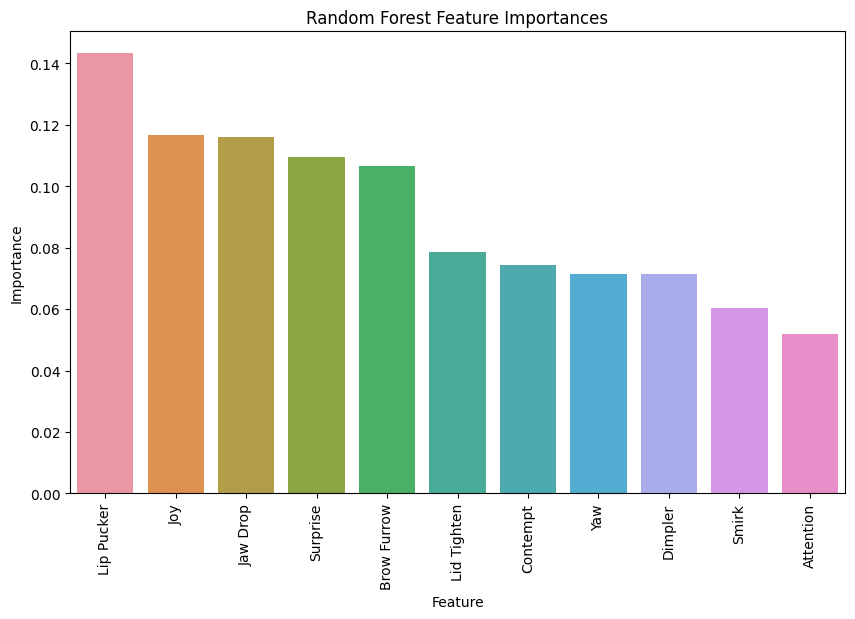

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature importances
importances = rf_classifier.feature_importances_
features = X_train.columns

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, features), reverse=True)

# Extract the sorted feature importances and feature names
sorted_feature_importances = [x[0] for x in sorted_importances]
sorted_feature_names = [x[1] for x in sorted_importances]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

<h3>RNN Classifier - sequence length of 100</h3>

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder


# Read the datasets before training the classifier
train_set = pd.read_csv(f"./datasets/ordered/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/ordered/validation_set_{timestamp}.csv")

# Select features and target
selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk' , 'Yaw']
target_feature = 'Grade Group'

# Convert the Grade Group label
label_encoder = LabelEncoder()
train_set['Grade Group'] = label_encoder.fit_transform(train_set['Grade Group'])
validation_set['Grade Group'] = label_encoder.transform(validation_set['Grade Group'])

# Normalize the features
scaler = StandardScaler()
train_set[selected_features] = scaler.fit_transform(train_set[selected_features])
validation_set[selected_features] = scaler.transform(validation_set[selected_features])

# Create sequences for time series data
def create_sequences(data, sequence_length=100):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length][selected_features].values
        label = data.iloc[i+sequence_length][target_feature]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 10  
X_train, y_train = create_sequences(train_set, sequence_length)
X_validation, y_validation = create_sequences(validation_set, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(selected_features))))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

# Evaluate the model on the validation set
y_pred_prob = model.predict(X_validation)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy on the validation set: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))


Epoch 1/10
3438/3438 [==============================] - 41s 12ms/step - loss: 0.5278 - accuracy: 0.7323 - val_loss: 1.2634 - val_accuracy: 0.3556
Epoch 2/10
3438/3438 [==============================] - 39s 11ms/step - loss: 0.4616 - accuracy: 0.7782 - val_loss: 1.4119 - val_accuracy: 0.4071
Epoch 3/10
3438/3438 [==============================] - 38s 11ms/step - loss: 0.4237 - accuracy: 0.8020 - val_loss: 1.3642 - val_accuracy: 0.4453
Epoch 4/10
3438/3438 [==============================] - 38s 11ms/step - loss: 0.3937 - accuracy: 0.8195 - val_loss: 1.7162 - val_accuracy: 0.4773
Epoch 5/10
3438/3438 [==============================] - 37s 11ms/step - loss: 0.3708 - accuracy: 0.8329 - val_loss: 2.1072 - val_accuracy: 0.3997
Epoch 6/10
3438/3438 [==============================] - 44s 13ms/step - loss: 0.3521 - accuracy: 0.8426 - val_loss: 2.3710 - val_accuracy: 0.4393
Epoch 7/10
3438/3438 [==============================] - 57s 17ms/step - loss: 0.3384 - accuracy: 0.8501 - val_loss: 2.9391 -

<h3>RNN Classifier - sequence length of 1000</h3>

In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping


# Read the datasets before training the classifier
train_set = pd.read_csv(f"./datasets/ordered/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/ordered/validation_set_{timestamp}.csv")

# Select features and target
selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk' , 'Yaw']
target_feature = 'Grade Group'

# Convert the Grade Group label
label_encoder = LabelEncoder()
train_set['Grade Group'] = label_encoder.fit_transform(train_set['Grade Group'])
validation_set['Grade Group'] = label_encoder.transform(validation_set['Grade Group'])

# Normalize the features
scaler = StandardScaler()
train_set[selected_features] = scaler.fit_transform(train_set[selected_features])
validation_set[selected_features] = scaler.transform(validation_set[selected_features])

# Create sequences for time series data
def create_sequences(data, sequence_length=1000):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length][selected_features].values
        label = data.iloc[i+sequence_length][target_feature]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 10  
X_train, y_train = create_sequences(train_set, sequence_length)
X_validation, y_validation = create_sequences(validation_set, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(selected_features))))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation), callbacks=[early_stopping])

# Evaluate the model on the validation set
y_pred_prob = model.predict(X_validation)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy on the validation set: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))


Epoch 1/100
3438/3438 [==============================] - 67s 19ms/step - loss: 0.5285 - accuracy: 0.7328 - val_loss: 1.2366 - val_accuracy: 0.4723
Epoch 2/100
3438/3438 [==============================] - 67s 19ms/step - loss: 0.4546 - accuracy: 0.7822 - val_loss: 1.9769 - val_accuracy: 0.3927
Epoch 3/100
3438/3438 [==============================] - 68s 20ms/step - loss: 0.4211 - accuracy: 0.8040 - val_loss: 2.5060 - val_accuracy: 0.4288
Epoch 4/100
8528/8528 [==============================] - 39s 5ms/step
Accuracy on the validation set: 0.4723204502896761
Confusion Matrix:
 [[ 58205  35695]
 [108304  70687]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.35      0.62      0.45     93900
         1.0       0.66      0.39      0.50    178991

    accuracy                           0.47    272891
   macro avg       0.51      0.51      0.47    272891
weighted avg       0.56      0.47      0.48    272891



<h3>RNN Classifier - sequence length of 4000</h3>

In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping


# Save the datasets with UTC timestamp
timestamp = '20240302_192723'

# Read the datasets before training the classifier
train_set = pd.read_csv(f"./datasets/ordered/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/ordered/validation_set_{timestamp}.csv")

# Select features and target
selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk' , 'Yaw']
target_feature = 'Grade Group'

# Convert the Grade Group label
label_encoder = LabelEncoder()
train_set['Grade Group'] = label_encoder.fit_transform(train_set['Grade Group'])
validation_set['Grade Group'] = label_encoder.transform(validation_set['Grade Group'])

# Normalize the features
scaler = StandardScaler()
train_set[selected_features] = scaler.fit_transform(train_set[selected_features])
validation_set[selected_features] = scaler.transform(validation_set[selected_features])

# Create sequences for time series data
def create_sequences(data, sequence_length=4000):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i+sequence_length][selected_features].values
        label = data.iloc[i+sequence_length][target_feature]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

sequence_length = 10  
X_train, y_train = create_sequences(train_set, sequence_length)
X_validation, y_validation = create_sequences(validation_set, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, len(selected_features))))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validation, y_validation), callbacks=[early_stopping])

# Evaluate the model on the validation set
y_pred_prob = model.predict(X_validation)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy on the validation set: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))


Epoch 1/100
3438/3438 [==============================] - 40s 11ms/step - loss: 0.5296 - accuracy: 0.7310 - val_loss: 1.5166 - val_accuracy: 0.4566
Epoch 2/100
3438/3438 [==============================] - 46s 13ms/step - loss: 0.4562 - accuracy: 0.7799 - val_loss: 1.9238 - val_accuracy: 0.4802
Epoch 3/100
3438/3438 [==============================] - 53s 15ms/step - loss: 0.4180 - accuracy: 0.8042 - val_loss: 2.5141 - val_accuracy: 0.4369
Epoch 4/100
8528/8528 [==============================] - 30s 4ms/step
Accuracy on the validation set: 0.4565595787329007
Confusion Matrix:
 [[ 61540  32360]
 [115940  63051]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.35      0.66      0.45     93900
         1.0       0.66      0.35      0.46    178991

    accuracy                           0.46    272891
   macro avg       0.50      0.50      0.46    272891
weighted avg       0.55      0.46      0.46    272891



In [12]:
# Evaluate the model on the validation set
y_pred_prob = model.predict(X_validation)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy on the validation set: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred))
print("Classification Report:\n", classification_report(y_validation, y_pred))

8528/8528 [==============================] - 20s 2ms/step
Accuracy on the validation set: 0.5391310083513198
Confusion Matrix:
 [[56278 37622]
 [88145 90846]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.39      0.60      0.47     93900
         1.0       0.71      0.51      0.59    178991

    accuracy                           0.54    272891
   macro avg       0.55      0.55      0.53    272891
weighted avg       0.60      0.54      0.55    272891



<h2>HMMs - Hidden Markov Models</h2>

In [18]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
train_set = pd.read_csv(f"./datasets/ordered/train_set_{timestamp}.csv")
validation_set = pd.read_csv(f"./datasets/ordered/validation_set_{timestamp}.csv")

# Select features and target
selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk', 'Yaw']
target_feature = 'Grade Group'

# Normalize the features
scaler = StandardScaler()
train_set[selected_features] = scaler.fit_transform(train_set[selected_features])
validation_set[selected_features] = scaler.transform(validation_set[selected_features])

# Get the training and validation data
X_train = train_set[selected_features].values
y_train = train_set[target_feature].values

X_validation = validation_set[selected_features].values
y_validation = validation_set[target_feature].values

# Convert target labels to integers for consistency
label_mapping = {'Above 55': 0, 'Below 55': 1}
y_validation_int = np.array([label_mapping[label] for label in y_validation])

# Train the Hidden Markov Model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(X_train)

# Predict hidden states on the validation set
hidden_states_validation = model.predict(X_validation)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_validation_int, hidden_states_validation)
print(f"Accuracy on the validation set: {accuracy}")

print("Confusion Matrix:\n", confusion_matrix(y_validation_int, hidden_states_validation))
print("Classification Report:\n", classification_report(y_validation_int, hidden_states_validation))


Model is not converging.  Current: 216385.8423169874 is not greater than 216385.86885506683. Delta is -0.02653807942988351


Accuracy on the validation set: 0.53838937929872
Confusion Matrix:
 [[ 71595  22315]
 [103659  75332]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.76      0.53     93910
           1       0.77      0.42      0.54    178991

    accuracy                           0.54    272901
   macro avg       0.59      0.59      0.54    272901
weighted avg       0.65      0.54      0.54    272901



<h3>Time Series KNN</h3>

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
import pandas as pd

def convert_and_trim_sequences(data, selected_features, target_feature, trim_length=None):
    X = []
    y = []

    for respondent_id, respondent_data in data.groupby('Respondent'):
        # Extract features and label
        time_series = respondent_data[selected_features].values
        label = respondent_data[target_feature].values[0]

        # Trim sequences if specified
        if trim_length:
            time_series = time_series[:trim_length, :]

        X.append(time_series)
        y.append(label)

    X = np.array(X)
    y = np.array(y)

    return X, y

# Load data
file_path = './facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv'
facial_expression_data = df = pd.read_csv(file_path, low_memory=False)

# Extract features and labels
selected_features = ['Contempt', 'Joy', 'Surprise', 'Attention', 'Jaw Drop', 'Brow Furrow', 'Lip Pucker', 
                     'Dimpler', 'Lid Tighten', 'Smirk', 'Yaw']
target_feature = 'Grade Group'

# Split respondents into training and validation sets
respondents = facial_expression_data['Respondent'].unique()
respondents_train, respondents_val = train_test_split(respondents, test_size=5, random_state=42)

# Extract features and labels for training
X_train, y_train = convert_and_trim_sequences(facial_expression_data[facial_expression_data['Respondent'].isin(respondents_train)], selected_features, target_feature, trim_length=None)

# Extract features and labels for validation
X_val, y_val = convert_and_trim_sequences(facial_expression_data[facial_expression_data['Respondent'].isin(respondents_val)], selected_features, target_feature, trim_length=None)

# Scale the time series data
scaler = TimeSeriesScalerMinMax()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create KNeighborsTimeSeriesClassifier instance
knn_clf = KNeighborsTimeSeriesClassifier(n_neighbors=5, metric='dtw')

# Fit the classifier
knn_clf.fit(X_train_scaled, y_train)

# Predict labels for validation data
predictions_val = knn_clf.predict(X_val_scaled)

# Calculate accuracy on validation set
accuracy_val = accuracy_score(y_val, predictions_val)
print("Validation Accuracy:", accuracy_val)
print("Confusion Matrix:\n", confusion_matrix(y_validation_int, hidden_states_validation))
print("Classification Report:\n", classification_report(y_validation_int, hidden_states_validation))

ValueError: Number of features of the provided timeseries(last dimension) must match the one of the fitted data! ((11, 29081, 11) and (0, 0, 0) are passed shapes)